# Linear regression with
* Linear Regression
* Ridge
* Lasso
* KNN
* Decision Tree
* SVM
* XGBRegressor
* LGBMRegressor

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.datasets import load_diabetes
from sklearn.linear_model import (
    Lasso,
    LinearRegression,
    Ridge,
)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (
    KFold,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


# Load diabetes dataset

In [2]:
diabetes = load_diabetes()
dataset = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dataset["target"] = diabetes.target

dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Correlation matrix

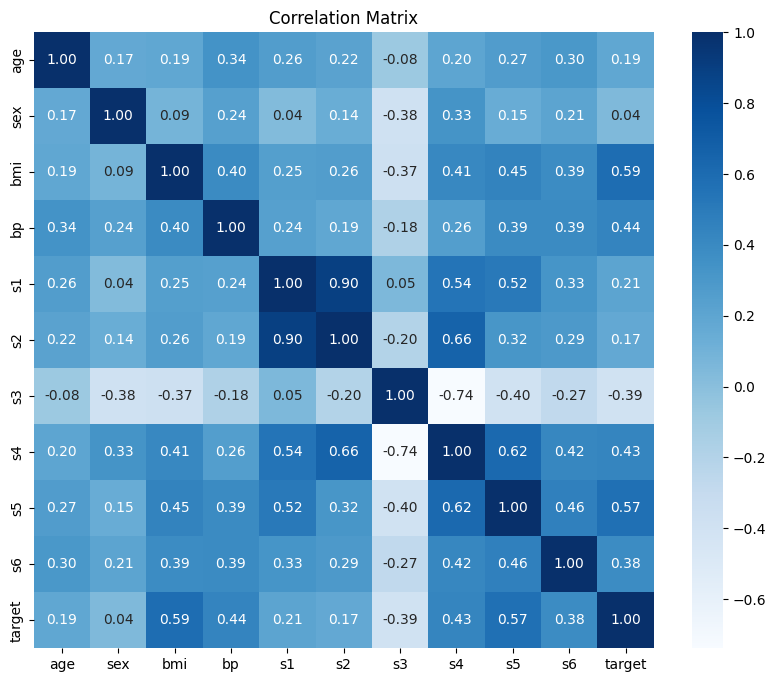

In [3]:
corr = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Prepare data
* Split data into training and test sets (holdout)
* Split data using cross-validation (k-fold)

In [21]:
array = dataset.to_numpy()
X = array[:, 0:10]
y = array[:, 10]

# holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# k-fold
n_splits = 10
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=7)

# Create, train, evaluate and compare models

In [29]:
models = {
    "LR": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNN": KNeighborsRegressor(),
    "CART": DecisionTreeRegressor(),
    "SVM": SVR(),
    "XGB": XGBRegressor(),
    "LGBM": LGBMRegressor(verbose=-1),
}

results = []
metrics = []

for name, model in models.items():
    scoring = [
        "r2",
        "explained_variance",
        "neg_max_error",
        "neg_mean_absolute_error",
        "neg_mean_squared_error",
        "neg_root_mean_squared_error",
        "neg_mean_squared_log_error",
        "neg_root_mean_squared_log_error",
        "neg_median_absolute_error",
        "neg_mean_poisson_deviance",
        "neg_mean_gamma_deviance",
        "neg_mean_absolute_percentage_error",
        "d2_absolute_error_score",
    ]
    cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

    results.append(cv_results)
    metrics.append({
        "name": name,
        "r2": cv_results["test_r2"].mean(),
        "explained_variance": cv_results["test_explained_variance"].mean(),
        "neg_max_error": cv_results["test_neg_max_error"].mean(),
        "neg_mean_absolute_error": cv_results["test_neg_mean_absolute_error"].mean(),
        "neg_mean_squared_error": cv_results["test_neg_mean_squared_error"].mean(),
        "neg_root_mean_squared_error": cv_results["test_neg_root_mean_squared_error"].mean(),
        "neg_mean_squared_log_error": cv_results["test_neg_mean_squared_log_error"].mean(),
        "neg_root_mean_squared_log_error": cv_results["test_neg_root_mean_squared_log_error"].mean(),
        "neg_median_absolute_error": cv_results["test_neg_median_absolute_error"].mean(),
        "neg_mean_poisson_deviance": cv_results["test_neg_mean_poisson_deviance"].mean(),
        "neg_mean_gamma_deviance": cv_results["test_neg_mean_gamma_deviance"].mean(),
        "neg_mean_absolute_percentage_error": cv_results["test_neg_mean_absolute_percentage_error"].mean(),
        "d2_absolute_error_score": cv_results["test_d2_absolute_error_score"].mean(),
    })

/home/taj/Documents/projects/data_science/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/taj/Documents/projects/data_science/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/taj/Documents/projects/data_science/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/taj/Documents/projects/data_science/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/taj/Documents/projects/data_science/.venv/lib/python3.13/site-packages/sklearn/utils/valid

In [30]:
pd.DataFrame(metrics).sort_values(by="r2", ascending=False)

,name,r2,explained_variance,neg_max_error,neg_mean_absolute_error,neg_mean_squared_error,neg_root_mean_squared_error,neg_mean_squared_log_error,neg_root_mean_squared_log_error,neg_median_absolute_error,neg_mean_poisson_deviance,neg_mean_gamma_deviance,neg_mean_absolute_percentage_error,d2_absolute_error_score
0,LR,0.479077,0.501002,-129.168857,-45.291561,-3066.488227,-55.106618,-0.187444,-0.427824,-40.147363,-21.173335,-0.176038,-0.407906,0.304087
1,Ridge,0.401851,0.425052,-122.316736,-50.329512,-3566.434465,-59.339669,-0.209856,-0.451373,-47.218116,-23.851697,-0.183339,-0.466140,0.229472
3,KNN,0.395951,0.430629,-132.060000,-47.619635,-3522.138403,-59.042659,-0.201565,-0.445250,-39.900000,-23.951855,-0.188612,-0.423830,0.266776
7,LGBM,0.389305,0.419114,-138.152115,-48.351888,-3638.597332,-59.687471,-0.206393,-0.447778,-41.896904,-24.813861,-0.196725,-0.425586,0.259761
2,Lasso,0.342439,0.363629,-127.991337,-53.582859,-3948.907268,-62.434356,-0.229731,-0.471970,-50.953355,-26.328543,-0.200634,-0.498357,0.181652
6,XGB,0.260141,0.294196,-144.704291,-52.922616,-4340.663577,-65.209238,-0.237868,-0.483982,-45.462046,-29.332104,-0.231245,-0.465137,0.184998
5,SVM,0.120361,0.181105,-161.680763,-60.975002,-5285.087092,-72.243328,-0.265349,-0.508626,-54.700859,-34.388874,-0.250290,-0.520343,0.069876
4,CART,-0.103523,-0.036856,-192.800000,-61.620556,-6254.058016,-78.655545,-0.340038,-0.578303,-47.200000,-44.267172,-0.399922,-0.491073,0.044721


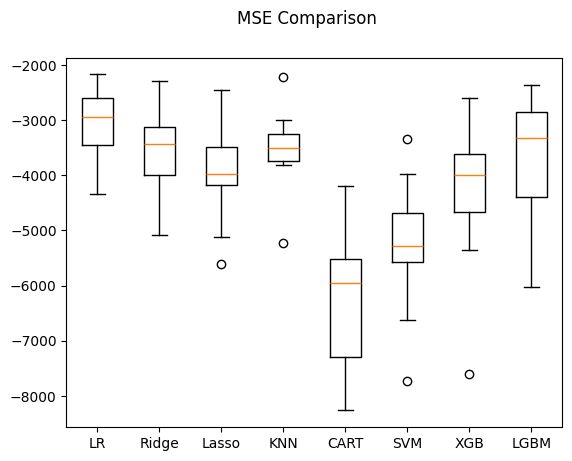

In [17]:
fig = plt.figure()
fig.suptitle("MSE Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

params = {
    "n_estimators": [500],
    "min_child_weight": [4, 5],
    "gamma": [i / 10.0 for i in range(3, 6)],
    "subsample": [i / 10.0 for i in range(6, 11)],
    "colsample_bytree": [i / 10.0 for i in range(6, 11)],
    "max_depth": [2, 3, 4, 6, 7],
    "objective": ["reg:squarederror", "reg:tweedie"],
    "booster": ["gbtree", "gblinear"],
    "eval_metric": ["rmse"],
    "eta": [i / 10.0 for i in range(3, 6)],
}

reg = XGBRegressor(nthread=-1)


n_iter_search = 100
random_search = RandomizedSearchCV(
    reg, param_distributions=params, n_iter=n_iter_search, cv=5, scoring="neg_mean_squared_error"
)

random_search.fit(X_train, y_train)

[12:08:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[12:08:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[12:08:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[12:08:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[12:08:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[12:08:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[12:08:14] WARNING: /workspace/src/learner.cc:738: 
Parame

,estimator,"XGBRegressor(...hread=-1, ...)"
,param_distributions,"{'booster': ['gbtree', 'gblinear'], 'colsample_bytree': [0.6, 0.7, ...], 'eta': [0.3, 0.4, ...], 'eval_metric': ['rmse'], ...}"
,n_iter,100
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [35]:
best_regressor = random_search.best_estimator_
best_regressor

,objective,'reg:squarederror'
,base_score,None
,booster,'gblinear'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'rmse'


In [37]:
random_search.best_params_

{'subsample': 0.7,
 'objective': 'reg:squarederror',
 'n_estimators': 500,
 'min_child_weight': 4,
 'max_depth': 6,
 'gamma': 0.5,
 'eval_metric': 'rmse',
 'eta': 0.5,
 'colsample_bytree': 0.7,
 'booster': 'gblinear'}

In [38]:
models = {
    "LR": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNN": KNeighborsRegressor(),
    "CART": DecisionTreeRegressor(),
    "SVM": SVR(),
    "LGBM": LGBMRegressor(verbose=-1),
    "XGB": XGBRegressor(
        n_estimators=random_search.best_params_["n_estimators"],
        min_child_weight=random_search.best_params_["min_child_weight"],
        gamma=random_search.best_params_["gamma"],
        subsample=random_search.best_params_["subsample"],
        colsample_bytree=random_search.best_params_["colsample_bytree"],
        max_depth=random_search.best_params_["max_depth"],
        objective=random_search.best_params_["objective"],
        booster=random_search.best_params_["booster"],
        eval_metric=random_search.best_params_["eval_metric"],
        eta=random_search.best_params_["eta"],
    ),
}

results = []
metrics = []

for name, model in models.items():
    scoring = [
        "r2",
        "explained_variance",
        "neg_max_error",
        "neg_mean_absolute_error",
        "neg_mean_squared_error",
        "neg_root_mean_squared_error",
        "neg_mean_squared_log_error",
        "neg_root_mean_squared_log_error",
        "neg_median_absolute_error",
        "neg_mean_poisson_deviance",
        "neg_mean_gamma_deviance",
        "neg_mean_absolute_percentage_error",
        "d2_absolute_error_score",
    ]
    cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

    results.append(cv_results)
    metrics.append({
        "name": name,
        "r2": cv_results["test_r2"].mean(),
        "explained_variance": cv_results["test_explained_variance"].mean(),
        "neg_max_error": cv_results["test_neg_max_error"].mean(),
        "neg_mean_absolute_error": cv_results["test_neg_mean_absolute_error"].mean(),
        "neg_mean_squared_error": cv_results["test_neg_mean_squared_error"].mean(),
        "neg_root_mean_squared_error": cv_results["test_neg_root_mean_squared_error"].mean(),
        "neg_mean_squared_log_error": cv_results["test_neg_mean_squared_log_error"].mean(),
        "neg_root_mean_squared_log_error": cv_results["test_neg_root_mean_squared_log_error"].mean(),
        "neg_median_absolute_error": cv_results["test_neg_median_absolute_error"].mean(),
        "neg_mean_poisson_deviance": cv_results["test_neg_mean_poisson_deviance"].mean(),
        "neg_mean_gamma_deviance": cv_results["test_neg_mean_gamma_deviance"].mean(),
        "neg_mean_absolute_percentage_error": cv_results["test_neg_mean_absolute_percentage_error"].mean(),
        "d2_absolute_error_score": cv_results["test_d2_absolute_error_score"].mean(),
    })

/home/taj/Documents/projects/data_science/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/taj/Documents/projects/data_science/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/taj/Documents/projects/data_science/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/taj/Documents/projects/data_science/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/taj/Documents/projects/data_science/.venv/lib/python3.13/site-packages/sklearn/utils/valid

In [39]:
pd.DataFrame(metrics).sort_values(by="r2", ascending=False)

,name,r2,explained_variance,neg_max_error,neg_mean_absolute_error,neg_mean_squared_error,neg_root_mean_squared_error,neg_mean_squared_log_error,neg_root_mean_squared_log_error,neg_median_absolute_error,neg_mean_poisson_deviance,neg_mean_gamma_deviance,neg_mean_absolute_percentage_error,d2_absolute_error_score
7,XGB,0.479113,0.501087,-129.239434,-45.271654,-3065.774665,-55.099316,-0.186541,-0.426784,-40.183446,-21.119027,-0.174304,-0.407634,0.304403
0,LR,0.479077,0.501002,-129.168857,-45.291561,-3066.488227,-55.106618,-0.187444,-0.427824,-40.147363,-21.173335,-0.176038,-0.407906,0.304087
1,Ridge,0.401851,0.425052,-122.316736,-50.329512,-3566.434465,-59.339669,-0.209856,-0.451373,-47.218116,-23.851697,-0.183339,-0.466140,0.229472
3,KNN,0.395951,0.430629,-132.060000,-47.619635,-3522.138403,-59.042659,-0.201565,-0.445250,-39.900000,-23.951855,-0.188612,-0.423830,0.266776
6,LGBM,0.389305,0.419114,-138.152115,-48.351888,-3638.597332,-59.687471,-0.206393,-0.447778,-41.896904,-24.813861,-0.196725,-0.425586,0.259761
2,Lasso,0.342439,0.363629,-127.991337,-53.582859,-3948.907268,-62.434356,-0.229731,-0.471970,-50.953355,-26.328543,-0.200634,-0.498357,0.181652
5,SVM,0.120361,0.181105,-161.680763,-60.975002,-5285.087092,-72.243328,-0.265349,-0.508626,-54.700859,-34.388874,-0.250290,-0.520343,0.069876
4,CART,-0.068756,0.007454,-191.300000,-61.066905,-6111.578651,-77.881364,-0.332709,-0.573813,-50.650000,-44.166298,-0.402417,-0.474736,0.054287


# Models with all data

## Linear Regression

In [6]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

predictions = linear_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression RMSE: {np.sqrt(abs(mse))}")

Linear Regression MSE: 2966.049506689707
Linear Regression RMSE: 54.46144972996686


## Ridge

In [7]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

predictions = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Ridge MSE: {mse}")
print(f"Ridge RMSE: {np.sqrt(abs(mse))}")

Ridge MSE: 2981.3577463557176
Ridge RMSE: 54.60181083403478


## Lasso

In [8]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

predictions = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Lasso MSE: {mse}")
print(f"Lasso RMSE: {np.sqrt(abs(mse))}")

Lasso MSE: 3290.730832769837
Lasso RMSE: 57.36489198778149


## KNR (KNeighborsRegressor)

In [9]:
knr_model = KNeighborsRegressor(n_neighbors=5)
knr_model.fit(X_train, y_train)

predictions = knr_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"KNeighborsRegressor MSE: {mse}")
print(f"KNeighborsRegressor RMSE: {np.sqrt(abs(mse))}")

KNeighborsRegressor MSE: 3765.5671910112364
KNeighborsRegressor RMSE: 61.3642175132319


# But how linear regression works?

A linear regression is a mathematical model that seeks to describe the relationship between two variables through a linear equation. The independent variable is called x and the dependent variable is called y. The linear regression equation is given by:
y = mx + b
where m is the slope and b is the intercept.

It is usually done using the least squares method, which minimizes the sum of the squares of the differences between the observed values and the values predicted by the linear regression equation.